In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	8
float64		column 2	0
float64		column 3	8
float64		column 4	4
float64		column 5	12
float64		column 6	8
float64		column 7	0
float64		column 8	6
float64		column 9	6
float64		column 10	4
float64		column 11	12
float64		column 12	4


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,792.000000,800.000000,792.000000,796.000000,788.000000,792.000000,800.000000,794.000000,794.000000,796.000000,788.000000,796.000000
mean,1.517460,1.276087,1.983897,1.935451,1.988569,2.005154,1.957646,1.997193,1.998900,1.987723,1.948557,1.963248
std,2.742951,3.635248,1.145195,1.161632,1.167151,1.139241,1.168619,1.132391,1.141078,1.154283,1.178843,1.123944
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.412200,-0.815775,1.022400,0.928748,0.976890,1.001362,0.949470,0.981097,1.059775,1.026400,0.880095,0.998952
50%,1.045130,0.920730,1.975100,1.902350,2.027350,2.006650,1.960500,2.006050,1.994150,2.000450,1.913400,1.950200
75%,3.972900,4.494825,2.924500,2.937200,2.963200,3.008400,2.984625,2.926625,3.002575,2.991525,2.975200,2.871625
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

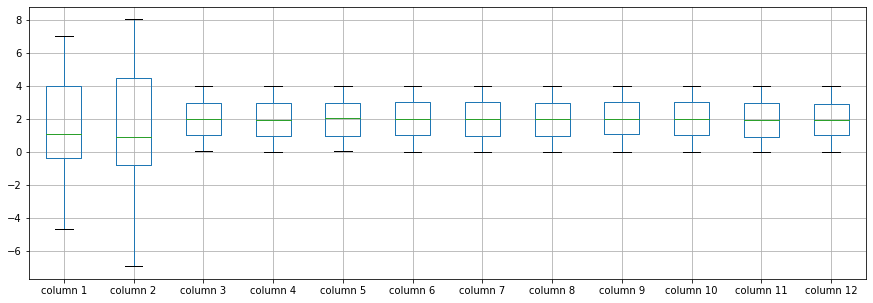

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.517460
column 2     1.276087
column 3     1.983897
column 4     1.935451
column 5     1.988569
column 6     2.005154
column 7     1.957646
column 8     1.997193
column 9     1.998900
column 10    1.987723
column 11    1.948557
column 12    1.963248
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.431873,-0.026601,0.002375,0.039968,0.053677,-0.008079,0.020373,-0.010797,0.001950,0.025491,0.023262
column 2,-0.431873,1.000000,-0.003992,-0.027949,-0.025321,-0.015345,0.027470,-0.006299,-0.001115,-0.049415,-0.090594,0.024425
column 3,-0.026601,-0.003992,1.000000,-0.031000,0.082541,0.001015,0.028893,-0.009823,0.001618,-0.005568,-0.032382,0.009314
column 4,0.002375,-0.027949,-0.031000,1.000000,-0.001118,-0.033306,0.034539,0.037408,-0.025664,0.041679,0.043189,-0.018548
column 5,0.039968,-0.025321,0.082541,-0.001118,1.000000,0.059791,0.018939,0.015955,-0.014169,-0.010921,-0.006659,0.010046
column 6,0.053677,-0.015345,0.001015,-0.033306,0.059791,1.000000,-0.071104,0.043344,0.018627,0.004160,-0.042319,-0.000814
column 7,-0.008079,0.027470,0.028893,0.034539,0.018939,-0.071104,1.000000,-0.047952,-0.009606,-0.043148,-0.016080,-0.005803
column 8,0.020373,-0.006299,-0.009823,0.037408,0.015955,0.043344,-0.047952,1.000000,-0.068045,-0.058402,0.005329,-0.037105
column 9,-0.010797,-0.001115,0.001618,-0.025664,-0.014169,0.018627,-0.009606,-0.068045,1.000000,0.038020,-0.013327,-0.022732
column 10,0.001950,-0.049415,-0.005568,0.041679,-0.010921,0.004160,-0.043148,-0.058402,0.038020,1.000000,-0.066259,0.043757


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+34,12+34+34,12+34+34,12+34+34+34+34,12+34+34+34+34+34,12+34+34+34+34,12+34+34+34,12+34+34,12+34,12], vae_layer = False, seed = 60)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.40301986694336
Epoch: 1 , loss: 29.25535633087158
Epoch: 2 , loss: 29.05756790161133
Epoch: 3 , loss: 28.07790168762207
Epoch: 4 , loss: 25.655465927124023
Epoch: 5 , loss: 24.648868827819825
Epoch: 6 , loss: 23.88008369445801
Epoch: 7 , loss: 23.423423652648925
Epoch: 8 , loss: 23.018897819519044
Epoch: 9 , loss: 22.73604522705078
Epoch: 10 , loss: 22.446115684509277
Epoch: 11 , loss: 22.002124824523925
Epoch: 12 , loss: 21.68003749847412
Epoch: 13 , loss: 21.533583908081056
Epoch: 14 , loss: 21.220802841186522
Epoch: 15 , loss: 21.15295593261719
Epoch: 16 , loss: 21.00890480041504
Epoch: 17 , loss: 20.76161884307861
Epoch: 18 , loss: 20.752760543823243
Epoch: 19 , loss: 20.460407485961912
Epoch: 20 , loss: 20.378646507263184
Epoch: 21 , loss: 20.520746269226073
Epoch: 22 , loss: 20.3395219039917
Epoch: 23 , loss: 20.231718330383302
Epoch: 24 , loss: 19.897178382873534
Epoch: 25 , loss: 20.17774406

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(16.516495228263405, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.06653920554782061

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NL_1(imp).xlsx", index=False, header=False)